Задание 3


Часть 1

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%pip install -q openpyxl
%pip install -q lxml

Считаем данные в удобную для работы таблицу

In [6]:
data1 = pd.read_excel('students_info.xlsx')
data2 = pd.read_html('results_ejudge.html')
data1 = data1.rename(columns={"login": "User"})
data2 = data2[0].drop(columns=['Place'])
data = pd.merge(data1, data2, on = 'User')
data = data.rename(columns={"group_faculty":"Учебная_группа", "group_out":"Группа_информатики", "Solved":"Решенные_задачи", "Score":"Результат"})
print(data)

         User  Учебная_группа  Группа_информатики     A     B     C    D  \
0    r0300101               1                  35  10.0   6.0   0.0  NaN   
1    r0300102               1                  32   0.0   NaN   NaN  NaN   
2    r0300103               1                  32   NaN   NaN   NaN  NaN   
3    r0300104               1                  32   NaN   NaN   NaN  NaN   
4    r0300105               1                  32   NaN   0.0   NaN  NaN   
..        ...             ...                 ...   ...   ...   ...  ...   
105  r0300807               8                  38  10.0   8.0   0.0  NaN   
106  r0300808               8                  38   9.0   3.0  19.0  0.0   
107  r0300809               8                  38   9.0   NaN  20.0  NaN   
108  r0300810               8                  38  10.0  10.0   NaN  NaN   
109  r0300811               8                  38   9.0   6.0   2.0  NaN   

        E     F   G   H  Решенные_задачи  Результат  
0     6.0  26.0 NaN NaN          

Прогруппируем значения и посчитаем средние значения

In [15]:
Mean_by_study_group = data.loc[:,["Учебная_группа","Решенные_задачи"]].groupby('Учебная_группа').mean()
Mean_by_IT_group = data.loc[:,["Группа_информатики","Решенные_задачи"]].groupby('Группа_информатики').mean()

Преобразуем данные для построения визуализации таблицы. Построим гистограммы

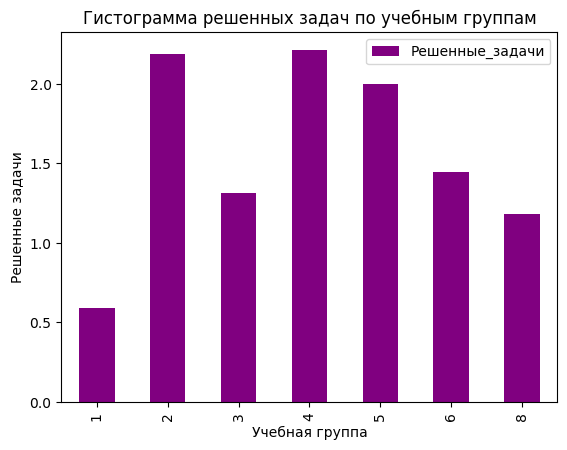

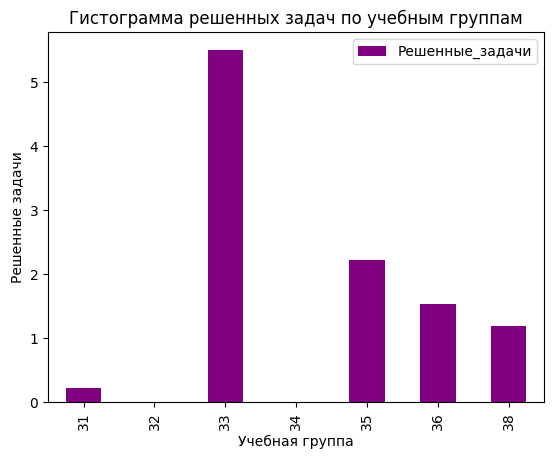

In [16]:
graph1 = {
    'Учебная_группа': list(Mean_by_study_group.index),
    'Решенные_задачи': list(Mean_by_study_group.loc[:, "Решенные_задачи"])
}
graph1 = pd.DataFrame(graph1)

graph1.plot(kind='bar', x='Учебная_группа', y='Решенные_задачи', color='purple')

plt.title('Гистограмма решенных задач по учебным группам')
plt.xlabel('Учебная группа')
plt.ylabel('Решенные задачи')

plt.show()

graph2 = {
    'Группа_информатики': list(Mean_by_IT_group.index),
    'Решенные_задачи': list(Mean_by_IT_group.loc[:, "Решенные_задачи"])
}
graph2 = pd.DataFrame(graph2)

graph2.plot(kind='bar', x='Группа_информатики', y='Решенные_задачи', color='purple')

plt.title('Гистограмма решенных задач по учебным группам')
plt.xlabel('Учебная группа')
plt.ylabel('Решенные задачи')

plt.show()

Часть 2

In [39]:
a=10 #Минимальный балл, чтобы задача G считалась решенной
b=10 #Минимальный балл, чтобы задача H считалась решенной
Result3 = data.loc[(data['G'] > a) | (data['H'] > b)]
print("Ребята, которые решили хотя бы одну из последних двух задач:")
for i in list(Result3.index):
    print (f"{Result3.loc[i,"User"]} из учебной группы № {Result3.loc[i,"Учебная_группа"]} попал в группу по информатике № {Result3.loc[i,"Группа_информатики"]}")

Ребята, которые решили хотя бы одну из последних двух задач:
r0300205 из учебной группы № 2 попал в группу по информатике № 33
r0300206 из учебной группы № 2 попал в группу по информатике № 33
r0300209 из учебной группы № 2 попал в группу по информатике № 33
r0300212 из учебной группы № 2 попал в группу по информатике № 36
r0300301 из учебной группы № 3 попал в группу по информатике № 35
r0300314 из учебной группы № 3 попал в группу по информатике № 33
r0300414 из учебной группы № 4 попал в группу по информатике № 33
r0300508 из учебной группы № 5 попал в группу по информатике № 33
r0300511 из учебной группы № 5 попал в группу по информатике № 35
r0300514 из учебной группы № 5 попал в группу по информатике № 33
r0300515 из учебной группы № 5 попал в группу по информатике № 35
